# Analysis of Variance (ANOVA)
In its simplest form, is used to compare multiple means in a test for equivalence. In that sense, it’s a straightforward extension of the hypothesis test comparing two means. There’s a continuous variable from which the means of interest are calculated, and there’s at least one categorical variable that tells you how to define the groups for those means.

Basically, you’re testing groups to see if there’s a difference between them. Examples of when you might want to test different groups:

* A group of psychiatric patients are trying three different therapies: counseling, medication and biofeedback. You want to see if one therapy is better than the others.
* A manufacturer has two different processes to make light bulbs. They want to know if one process is better than the other.
* Students from different colleges take the same exam. You want to see if one college outperforms the other

## Groups or Levels
Different groups within the same independent variable. For example:
* The levels for “brand of cereal” might be Lucky Charms, Raisin Bran, Cornflakes — a total of three levels.
* The levels for “Calories” might be: sweetened, unsweetened — a total of two levels.

# One Way ANOVA
A one way ANOVA is used to compare two means from two independent (unrelated) groups. The null hypothesis for the test is that the two means are equal. Therefore, a significant result means that the two means are unequal.

This task will therefore require you to consider not only the variability within each of the k samples but the variability between the samples; this is why the test is referred to as an analysis of variance.
The test proceeds by first calculating various metrics associated with the overall variability and then calculating the within- and between-group variability. These figures involve sums of squared quantities and associated degrees of freedom values. All this culminates in a single test statistic and p-value targeting the aforementioned hypotheses.

# Two Way ANOVA
A Two Way ANOVA is an extension of the One Way ANOVA. With a One Way, you have one independent variable affecting a dependent variable. With a Two Way ANOVA, there are two independents. Use a two way ANOVA when you have one measurement variable (i.e. a quantitative variable) and two nominal variables. In other words, if your experiment has a quantitative outcome and you have two categorical explanatory variables, a two way ANOVA is appropriate.

# Hypotheses and Diagnostic Checking
Say you have a categorical-nominal variable that splits a total of $N$ numeric observations into $k$ distinct groups, where $k\geq2$. You’re looking to statistically
compare the $k$ groups’ means, $\mu_{1},\cdots, \mu_{k}$ , to see whether they can be claimed to be equal. The standard hypotheses are as follows:

* $H_{0}: \mu_{1}=\mu_{2}=\cdots=\mu_{k}$
* $H_{A}: \mu_{1},\mu_{2},\cdots, \mu_{k}$ are not all equal (or one mean is different)

(when $k = 2$, the two-sample t-test is equivalent to ANOVA)

The following assumptions need to be satisfied in order for the results of the basic one-way ANOVA test to be considered reliable:
* **Independence** The samples making up the $k$ groups must be independent of one another, and the observations in each group must be independent and identically distributed.
* **Normality** The observations in each group should be normally distributed, or at least approximately so.
* **Equality of variances** The variance of the observations in each group should be equal, or at least approximately so.


# ANOVA Table
![](anova.png)
* **Overall row** This relates to the scale on which the data as a whole sit. It doesn’t affect the outcome of the hypothesis test (since you’re interested only in the relative differences between means) and is sometimes removed from the table
* **Group row/Factor row** This relates to the data in the individual groups of interest, thereby accounting for the between-group variability.
* **Error row/Residual row** This accounts for the random deviation from the estimated means of each group, thereby accounting for the within group variability.
* **TOTAL row** This represents the raw data, based on the previous three ingredients. It is used to find the Error SS by differencing.

# Fitting ANOVA models - The aov() function 

``` aov(formula, data=dataframe)```
$y$ is the dependent variable and the letters $A$, $B$, and $C$ represent factors.

![](tab1.png)
![](tab2.png)


# The order in which the effects appear in a formula matters when:
* ## There’s more than one factor and the design is unbalanced
* ## Covariates are present.
When either of these two conditions is present, the variables on the right side of the equation will be correlated with each other.


# One Way ANOVA
This example comes from the cholesterol dataset in the multcomp package:

### Example

Fifty patients received one of five cholesterol-reducing drug regimens (trt). Three of the treatment conditions involved the same drug administered:
* 20 mg once per day (1time)
* 10mg twice per day (2times),
* 5 mg four times per day (4times).

The two remaining conditions (drugD and drugE) represented competing drugs.

Which drug regimen produced the greatest cholesterol reduction (response)?

In [1]:
# install.packages("multcomp")
library(multcomp)

Loading required package: mvtnorm
Loading required package: survival
Loading required package: TH.data
Loading required package: MASS

Attaching package: 'TH.data'

The following object is masked from 'package:MASS':

    geyser



In [2]:
attach(cholesterol)
summary(cholesterol)

     trt        response     
 1time :10   Min.   : 2.304  
 2times:10   1st Qu.: 8.409  
 4times:10   Median :12.605  
 drugD :10   Mean   :12.738  
 drugE :10   3rd Qu.:17.519  
             Max.   :27.244  

***

In [3]:
# Group sample sizes
table(trt)

trt
 1time 2times 4times  drugD  drugE 
    10     10     10     10     10 

### 10 patients received each of the drug regimens
***

In [4]:
# Group means
aggregate(response, by=list(trt), FUN=mean)

Group.1,x
1time,5.78197
2times,9.22497
4times,12.37478
drugD,15.36117
drugE,20.94752


### it appears that drugE produced the greatest cholesterol reduction, whereas 1time produced the least
***

In [5]:
# Group standard deviations
aggregate(response, by=list(trt), FUN=sd)

Group.1,x
1time,2.878113
2times,3.483054
4times,2.923119
drugD,3.454636
drugE,3.345003


### Standard deviations were relatively constant across the five groups, ranging from 2.88 to 3.48
***

In [6]:
# Test the group differences
fit <- aov(response ~ trt)
summary(fit)

            Df Sum Sq Mean Sq F value   Pr(>F)    
trt          4 1351.4   337.8   32.43 9.82e-13 ***
Residuals   45  468.8    10.4                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

### The ANOVA F test for treatment (trt) is significant (p < .0001), providing evidence that the five treatments aren’t all equally effective
![](tab3.png)
***


Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



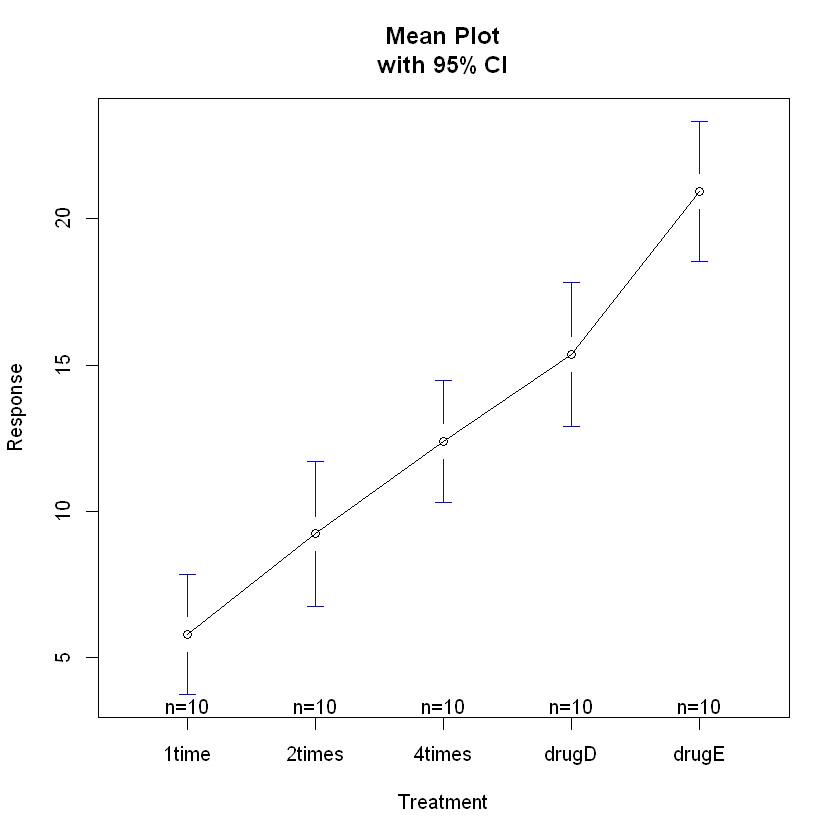

In [7]:
library(gplots)
plotmeans(response ~ trt, xlab="Treatment", ylab="Response", main="Mean Plot\nwith 95% CI")
detach(cholesterol)

### Group means and their confidence intervals
***

# Multiple Comparisons
The ANOVA F test for treatment tells you that the five drug regimens aren’t equally effective, but it doesn’t tell you which treatments differ from one another. You can use a multiple comparison procedure to answer this question. For example, the ```TukeyHSD()``` function provides a test of all pairwise differences between group means

In [8]:
TukeyHSD(fit)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = response ~ trt)

$trt
                  diff        lwr       upr     p adj
2times-1time   3.44300 -0.6582817  7.544282 0.1380949
4times-1time   6.59281  2.4915283 10.694092 0.0003542
drugD-1time    9.57920  5.4779183 13.680482 0.0000003
drugE-1time   15.16555 11.0642683 19.266832 0.0000000
4times-2times  3.14981 -0.9514717  7.251092 0.2050382
drugD-2times   6.13620  2.0349183 10.237482 0.0009611
drugE-2times  11.72255  7.6212683 15.823832 0.0000000
drugD-4times   2.98639 -1.1148917  7.087672 0.2512446
drugE-4times   8.57274  4.4714583 12.674022 0.0000037
drugE-drugD    5.58635  1.4850683  9.687632 0.0030633


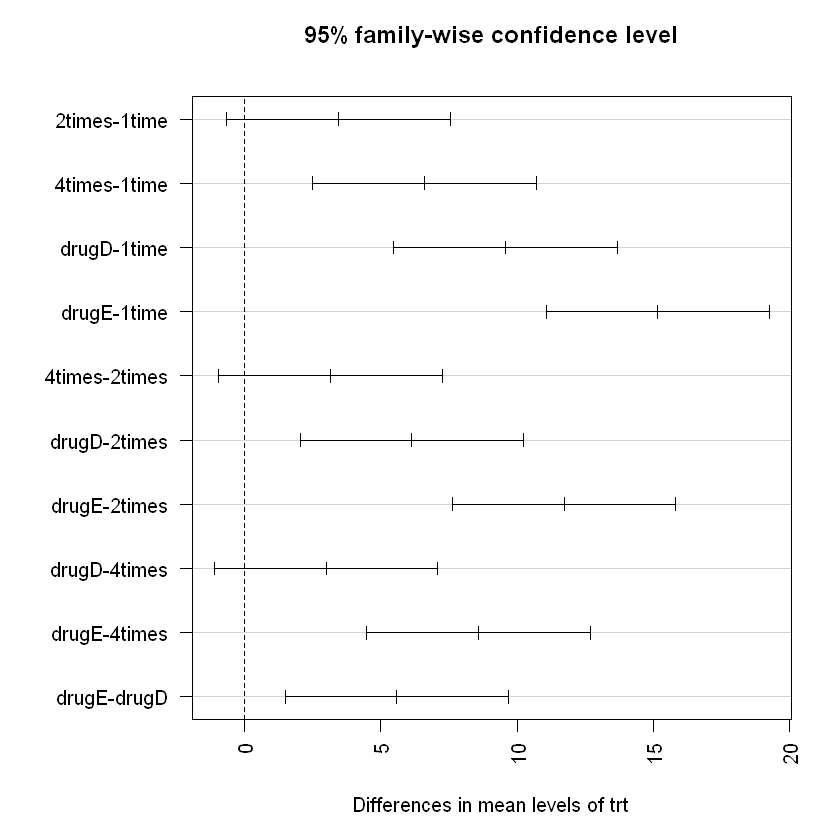

In [9]:
par(las=2) # rotates the axis labels
par(mar=c(5,8,4,2)) # increases the left margin area so that the labels fit
plot(TukeyHSD(fit))

* 1time and 2times aren’t significantly different from each other ($p = 0.138$)
* 4time and 2times aren’t significantly different from each other ($p = 0.138$)
* In this graph, confidence intervals that include 0 indicate treatments that aren’t significantly different (p > 0.05).

# Assessing test Assumptions

In a one-way ANOVA, the dependent variable is assumed to be normally distributed and have equal variance in each group. You can use a Q-Q plot to assess the normality assumption

Loading required package: carData


[1] 19 38

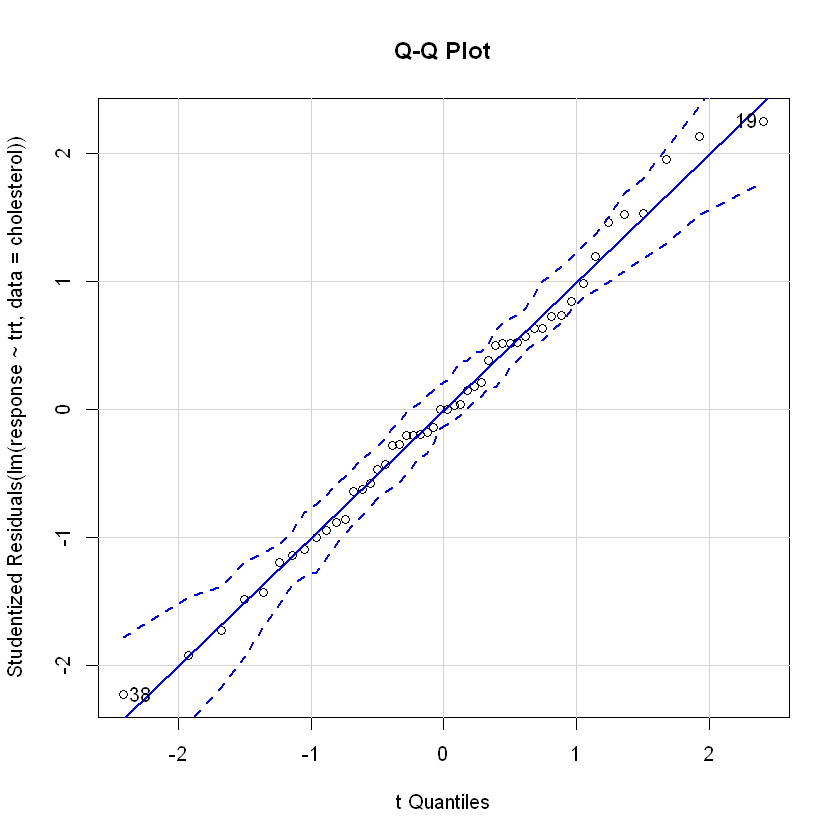

In [10]:
library(car)
qqPlot(lm(response ~ trt, data=cholesterol),simulate=TRUE, main="Q-Q Plot", labels=FALSE)

R provides several tests for the equality (homogeneity) of variances. For example, you can perform Bartlett’s test with this code:

In [11]:
bartlett.test(response ~ trt, data=cholesterol)


	Bartlett test of homogeneity of variances

data:  response by trt
Bartlett's K-squared = 0.57975, df = 4, p-value = 0.9653


Bartlett’s test indicates that the variances in the five groups don’t differ significantly ($p = 0.97$).

### Test for outliers

In [12]:
outlierTest(fit)

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
   rstudent unadjusted p-value Bonferroni p
19 2.251149           0.029422           NA

From the output, you can see that there’s no indication of outliers in the cholesterol data (NA occurs when p > 1).

# Two-way factorial ANOVA
In a two-way factorial ANOVA, subjects are assigned to groups that are formed from the cross-classification of two factors.

In two-way ANOVA, the hypotheses should be set along the following lines:

* $H_{0}$ :
    * $G_{1}$ has no main (marginal) effect on the mean of $O$.
    * $G_{2}$ has no main (marginal) effect on the mean of $O$.
    * There is no interactive effect of $G_{1}$ with $G_{2}$ on the mean of $O$.
* $H_{A}$ : Separately, each statement in $H_{0}$ is incorrect.

You can see from these general hypotheses that you now have to obtain a p-value for each of the three components.

## Example
> Sixty guinea pigs are randomly assigned to receive one of three levels of ascorbic acid ($0.5$, $1$, or $2$ mg) and one of two delivery methods (orange juice or Vitamin C), under the restriction that each treatment combination has 10 guinea pigs. The dependent variable is tooth length.

In [13]:
attach(ToothGrowth)

In [14]:
table(supp, dose)

    dose
supp 0.5  1  2
  OJ  10 10 10
  VC  10 10 10

In [15]:
aggregate(len, by=list(supp, dose), FUN=mean)

Group.1,Group.2,x
OJ,0.5,13.23
VC,0.5,7.98
OJ,1.0,22.70
VC,1.0,16.77
OJ,2.0,26.06
VC,2.0,26.14


In [16]:
aggregate(len, by=list(supp, dose), FUN=sd)

Group.1,Group.2,x
OJ,0.5,4.459709
VC,0.5,2.746634
OJ,1.0,3.910953
VC,1.0,2.515309
OJ,2.0,2.655058
VC,2.0,4.797731


In [17]:
dose <- factor(dose)

In [18]:
fit <- aov(len ~ supp*dose)
summary(fit)

            Df Sum Sq Mean Sq F value   Pr(>F)    
supp         1  205.4   205.4  15.572 0.000231 ***
dose         2 2426.4  1213.2  92.000  < 2e-16 ***
supp:dose    2  108.3    54.2   4.107 0.021860 *  
Residuals   54  712.1    13.2                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

1. The table statement indicates that you have a balanced design (equal sample sizes in each cell of the design)
2. The aggregate statements provide the cell means and standard deviations.
3. The dose variable is converted to a factor so that the aov() function will treat it as a grouping variable. 
4. The ANOVA table provided by the summary() function indicates that both main effects (supp and dose) and the interaction between these factors are significant.

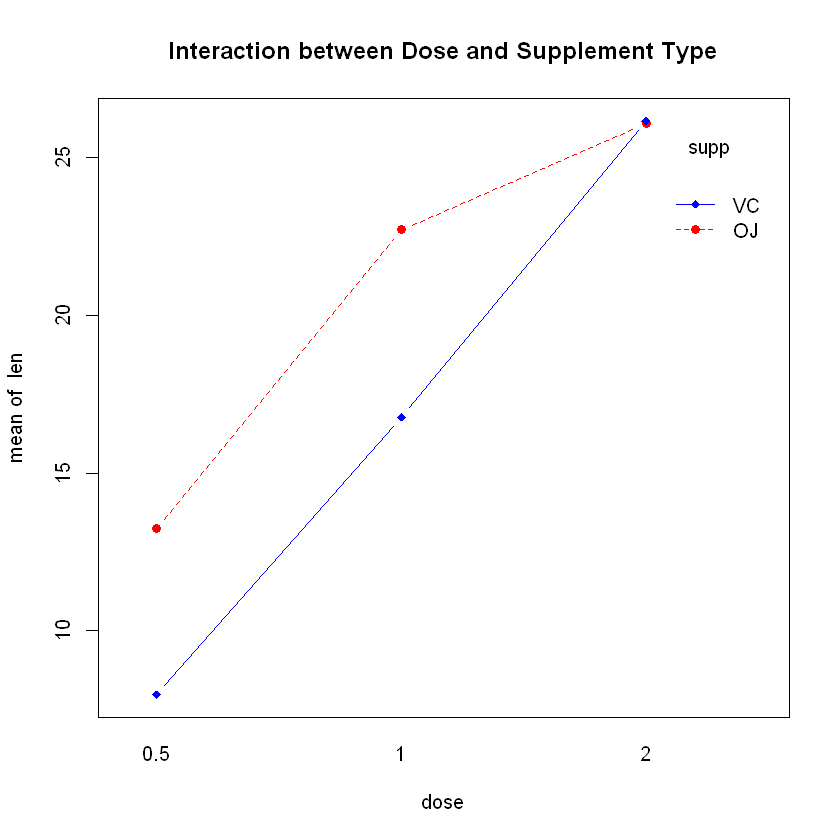

In [19]:
interaction.plot(dose, supp, len, type="b", col=c("red","blue"), pch=c(16, 18), main = "Interaction between Dose and Supplement Type")

The plot provides the mean tooth length for each supplement at each dosage.

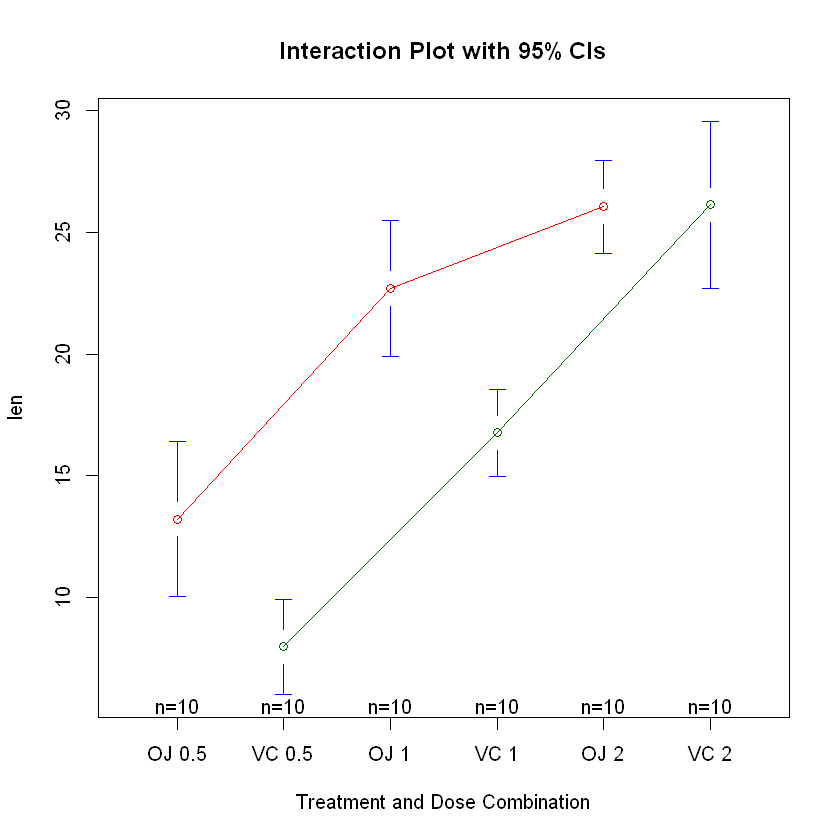

In [20]:
library(gplots)
plotmeans(len ~ interaction(supp, dose, sep=" "),
connect=list(c(1,3,5),c(2,4,6)),
col=c("red", "darkgreen"),
main = "Interaction Plot with 95% CIs",
xlab="Treatment and Dose Combination")

The graph includes the means, as well as error bars (95% confidence intervals) and sample sizes.

Loading required package: lattice
Loading required package: grid
Loading required package: latticeExtra
Loading required package: gridExtra
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'HH'

The following objects are masked from 'package:car':

    logit, vif

The following object is masked from 'package:gplots':

    residplot



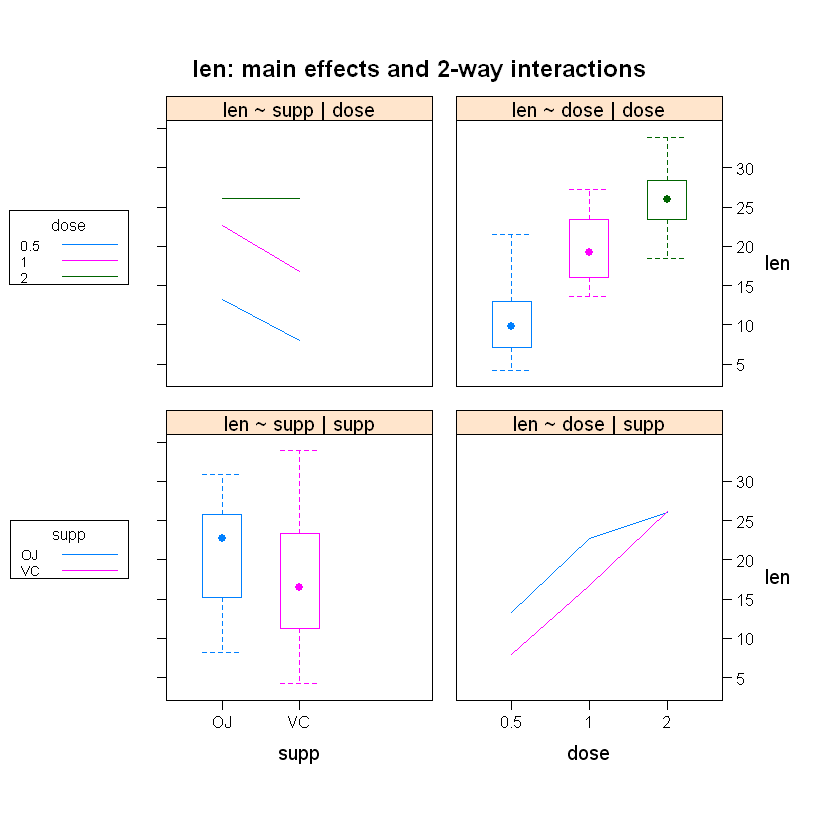

In [21]:
# install.packages("HH")
library(HH)
interaction2wt(len~supp*dose)

It displays both the main effects (the box plots) and the two-way interactions for designs of any complexity (two-way ANOVA, three-way ANOVA, and so on).

# Multivariate analysis of variance (MANOVA)
If there’s more than one dependent (outcome) variable, you can test them simultaneously using a multivariate analysis of variance (MANOVA).

In this example, you’re interested in whether the calories, fat, and sugar content of US cereals vary by store shelf, where 1 is the bottom shelf, 2 is the middle shelf, and 3 is the top shelf. Calories, fat, and sugars are the dependent variables, and shelf is the independent variable, with three levels (1, 2, and 3).

In [23]:
library(MASS)
attach(UScereal)
shelf <- factor(shelf) # First, the shelf variable is converted to a factor so that it can represent a grouping variable in the analyses.
y <- cbind(calories, fat, sugars) # cbind() function is used to form a matrix of the three dependent variables (calories, fat, and sugars)
aggregate(y, by=list(shelf), FUN=mean) # aggregate() function provides the shelf means

Group.1,calories,fat,sugars
1,119.4774,0.6621338,6.295493
2,129.8162,1.3413488,12.507670
3,180.1466,1.9449071,10.856821


In [27]:
cov(y) # cov() function provides the variance and the covariances across cereals

,calories,fat,sugars
calories,3895.24210,60.674383,180.380317
fat,60.67438,2.713399,3.995474
sugars,180.38032,3.995474,34.050018


The ```manova()``` function provides the multivariate test of group differences. The significant F value indicates that the three groups differ on the set of nutritional measures.

In [25]:
fit <- manova(y ~ shelf)
summary(fit)

          Df Pillai approx F num Df den Df    Pr(>F)    
shelf      2 0.4021   5.1167      6    122 0.0001015 ***
Residuals 62                                            
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [26]:
summary.aov(fit) #summary.aov() function produces the univariate one-way ANOVAs

 Response calories :
            Df Sum Sq Mean Sq F value    Pr(>F)    
shelf        2  50435 25217.6  7.8623 0.0009054 ***
Residuals   62 198860  3207.4                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Response fat :
            Df Sum Sq Mean Sq F value  Pr(>F)  
shelf        2  18.44  9.2199  3.6828 0.03081 *
Residuals   62 155.22  2.5035                  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Response sugars :
            Df  Sum Sq Mean Sq F value   Pr(>F)   
shelf        2  381.33 190.667  6.5752 0.002572 **
Residuals   62 1797.87  28.998                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
